# Determining Wine quality

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing wine-quality dataset

In [2]:
data = pd.read_csv("./csv/org_winequality.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Checking for null values

In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

no null values in this dataset!!

## Feature and Target Selection

In [4]:
features = data.iloc[:,:-1]
y_temp = data.iloc[:,-1]

y = y_temp.values
X = features.values

##### checking x and y values

In [5]:
print(X)
print(y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[5 5 5 ... 6 5 6]


##### exploring unique values of y

In [6]:
print(y_temp.unique())

[5 6 7 4 8 3]


## Inspecting Correlation

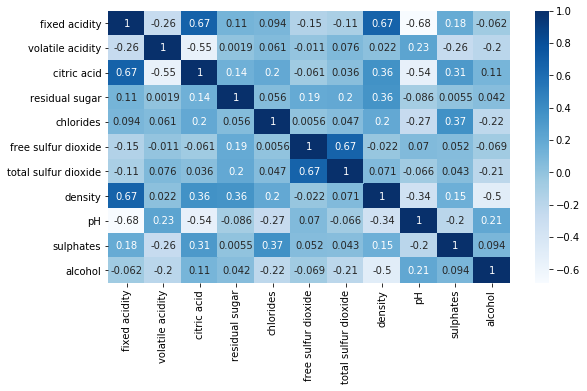

In [7]:
plt.figure(figsize=(9,5))
sns.heatmap(features.corr(), cmap="Blues", annot=True)

## PCA (Principal Component Analysis)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

print(X_r)

[[-13.22490501  -2.02389981]
 [ 22.03772361   4.40832155]
 [  7.16267333  -2.50146086]
 ...
 [ -3.43135351  14.27124349]
 [  1.13287834  16.31616732]
 [ -3.8743766    3.12634754]]


##### Note
Here 'y' ie 'quality' has [5 6 7 4 8 3] values as unique values

We need to plot 'X_r' for each of this 'y' values and see if there is a hyper-plane seperating 'quality'

In [9]:
q = {}
wine_quality = [3,4,5,6,7,8]
for wq in wine_quality:
    q["string{0}".format(wq)] = np.array([row for row,index in zip(X_r, y) if index==wq])

##### Note: DRY
* q["string{0}".format(wq)] creates new variable (viz. q3,q4,q5,q6,q7,q8) every time while looping through,

    this helps us in needing to repeat our code 


## Plotting to analyse if there is a line/plane that seperates various wine qualities

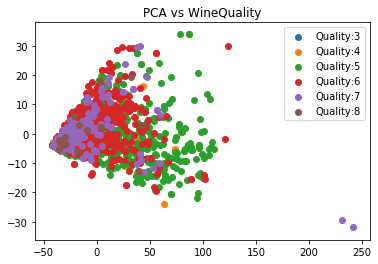

In [11]:
wine_quality = [3,4,5,6,7,8]
for w in wine_quality:
    plt.scatter(q["string{0}".format(w)][:,0],q["string{0}".format(w)][:,1], label = "Quality:"+str(w))
    plt.legend(loc="upper right")
    plt.title("PCA vs WineQuality")
    
plt.savefig("./csv/graph.png", dpi = 150)
plt.show()


### Splitting the dataset for training and testing

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

## Applying diffirent ML model to classify and predict the target

#### 1. SVM
#### 2. LogisticRegression
#### 3. k-Nearest Neighbors Classifier
#### 4. GaussianNB 
#### 5. Random Forest
#### 6. XGBoost
#### 7. DecisionTreeClassifier
#### 8. Ensembled Classifier
#### 9. ExtraTreesClassifier
#### 10. VotingClassifier

### 1. SVM

In [47]:
from sklearn import svm
svm_model = svm.SVC(C=1.0,kernel='rbf')
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

### 2.  LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 3. k-Nearest Neighbors Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

### 4. GaussianNB

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred = gnb_model.predict(x_test)

### 5. Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rnn_model = RandomForestClassifier(n_estimators=200)
rnn_model.fit(x_train, y_train)
y_pred = rnn_model.predict(x_test)

### 6. XGBoost

In [52]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

### 7. DecisionTreeClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

### 8. Ensembled Classifier

In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging_model = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
bagging_model.fit(x_train, y_train)
y_pred = bagging_model.predict(x_test)

### 9. ExtraTreesClassifier

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
et_model = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
et_model.fit(x_train, y_train)
y_pred = et_model.predict(x_test)

### Comparing Actual and Predicted Value

In [56]:
models = [svm_model, lr_model, knn_model, gnb_model, rnn_model, xgb_model, dt_model, bagging_model, et_model]
model_names = ["SVM", "LogisticRegression", "k-Nearest Neighbors Classifier", "GaussianNB", "Random Forest", "XGBoost", "DecisionTreeClassifier", "Ensembled Classifier", "ExtraTreesClassifier"]
for model,model_name in zip(models,model_names):
    df = pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(x_test)})  
    print(f"{model_name}\n{df.head()}\n")

SVM
   Actual  Predicted
0       5          5
1       5          6
2       7          6
3       8          6
4       5          5

LogisticRegression
   Actual  Predicted
0       5          5
1       5          5
2       7          6
3       8          6
4       5          5

k-Nearest Neighbors Classifier
   Actual  Predicted
0       5          5
1       5          6
2       7          4
3       8          6
4       5          5

GaussianNB
   Actual  Predicted
0       5          5
1       5          5
2       7          7
3       8          7
4       5          5

Random Forest
   Actual  Predicted
0       5          5
1       5          5
2       7          7
3       8          8
4       5          5

XGBoost
   Actual  Predicted
0       5          5
1       5          5
2       7          7
3       8          8
4       5          5

DecisionTreeClassifier
   Actual  Predicted
0       5          5
1       5          5
2       7          7
3       8          8
4       5          5

E

## Accuracy Score

In [57]:
from sklearn.metrics import accuracy_score

models = [svm_model, lr_model, knn_model, gnb_model, rnn_model, xgb_model, dt_model, bagging_model, et_model]
model_names = ["SVM", "LogisticRegression", "k-Nearest Neighbors Classifier", "GaussianNB", "Random Forest", "XGBoost", "DecisionTreeClassifier", "Ensembled Classifier", "ExtraTreesClassifier"]
for model,model_name in zip(models,model_names):
    score = accuracy_score(y_test, model.predict(x_test))
    print(f"{model_name} Accuracy Score = {round(score,4)}")

SVM Accuracy Score = 0.5125
LogisticRegression Accuracy Score = 0.575
k-Nearest Neighbors Classifier Accuracy Score = 0.5167
GaussianNB Accuracy Score = 0.525
Random Forest Accuracy Score = 0.6792
XGBoost Accuracy Score = 0.6521
DecisionTreeClassifier Accuracy Score = 0.5958
Ensembled Classifier Accuracy Score = 0.5604
ExtraTreesClassifier Accuracy Score = 0.65


##### Note: 
Comparing the accuracy the sores it can be inferred that "Random Forest" is having the highest accuracy followed by 
* XGBoost,
* ExtraTreesClassifier and
* DecisionTreeClassifier

SVM is the least efficient model

## Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix

models = [svm_model, lr_model, knn_model, gnb_model, rnn_model, xgb_model, dt_model, bagging_model, et_model]
model_names = ["SVM", "LogisticRegression", "k-Nearest Neighbors Classifier", "GaussianNB", "Random Forest", "XGBoost", "DecisionTreeClassifier", "Ensembled Classifier", "ExtraTreesClassifier"]
for model,model_name in zip(models,model_names):
    matrix = confusion_matrix(y_test, model.predict(x_test))
    print(f"{model_name} \n**Confusion Matrix**\n{matrix}\n")

SVM 
**Confusion Matrix**
[[  0   0   0   2   0   0]
 [  0   0   2  13   0   0]
 [  0   0  99 112   0   0]
 [  0   0  44 146   0   0]
 [  0   0  10  48   1   0]
 [  0   0   0   3   0   0]]

LogisticRegression 
**Confusion Matrix**
[[  0   0   2   0   0   0]
 [  0   0  12   3   0   0]
 [  0   1 156  53   1   0]
 [  0   0  70 120   0   0]
 [  0   0   2  57   0   0]
 [  0   0   0   3   0   0]]

k-Nearest Neighbors Classifier 
**Confusion Matrix**
[[  0   0   1   1   0   0]
 [  0   0   8   6   1   0]
 [  0   6 148  53   4   0]
 [  0   3  82  90  14   1]
 [  0   4  16  29  10   0]
 [  0   0   1   2   0   0]]

GaussianNB 
**Confusion Matrix**
[[  1   0   1   0   0   0]
 [  0   1   9   5   0   0]
 [  5  11 140  47   7   1]
 [  1   5  71  76  36   1]
 [  0   0   1  24  33   1]
 [  0   0   0   1   1   1]]

Random Forest 
**Confusion Matrix**
[[  0   1   0   1   0   0]
 [  0   0  11   4   0   0]
 [  0   0 166  44   1   0]
 [  0   0  48 134   8   0]
 [  0   2   1  31  25   0]
 [  0   0   0   1   

## Classification Report

In [59]:
from sklearn.metrics import classification_report

models = [svm_model, lr_model, knn_model, gnb_model, rnn_model, xgb_model, dt_model, bagging_model, et_model]
model_names = ["SVM", "LogisticRegression", "k-Nearest Neighbors Classifier", "GaussianNB", "Random Forest", "XGBoost", "DecisionTreeClassifier", "Ensembled Classifier", "ExtraTreesClassifier"]
for model,model_name in zip(models,model_names):
    c_report = classification_report(y_test, model.predict(x_test))
    print(f"{model_name} \nclassification_report\n{c_report}\n")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classif

SVM 
classification_report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        15
           5       0.64      0.47      0.54       211
           6       0.45      0.77      0.57       190
           7       1.00      0.02      0.03        59
           8       0.00      0.00      0.00         3

    accuracy                           0.51       480
   macro avg       0.35      0.21      0.19       480
weighted avg       0.58      0.51      0.47       480


LogisticRegression 
classification_report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        15
           5       0.64      0.74      0.69       211
           6       0.51      0.63      0.56       190
           7       0.00      0.00      0.00        59
           8       0.00      0.00      0.00         3

    acc

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Evaluating model for a custom input

In [60]:
x_test[0,:]

array([11.6  ,  0.42 ,  0.53 ,  3.3  ,  0.105, 33.   , 98.   ,  1.001,
        3.2  ,  0.95 ,  9.2  ])

In [61]:
test_value = np.array([[12, 0.2, 0.6, 3, 0.12, 30, 98, 1.9, 2.2, 1, 7]])

models = [svm_model, lr_model, knn_model, gnb_model, rnn_model, xgb_model, dt_model, bagging_model, et_model]
model_names = ["SVM", "LogisticRegression", "k-Nearest Neighbors Classifier", "GaussianNB", "Random Forest", "XGBoost", "DecisionTreeClassifier", "Ensembled Classifier", "ExtraTreesClassifier"]

for model,model_name in zip(models,model_names):
    own_pred = model.predict(test_value)
    print(f"{model_name} Prediction = {own_pred}")

SVM Prediction = [5]
LogisticRegression Prediction = [5]
k-Nearest Neighbors Classifier Prediction = [5]
GaussianNB Prediction = [8]
Random Forest Prediction = [6]
XGBoost Prediction = [5]
DecisionTreeClassifier Prediction = [6]
Ensembled Classifier Prediction = [5]
ExtraTreesClassifier Prediction = [6]


##### Note: 
The wine quality for the enterd value set is approximated to 6, this is based on our assumption that "Random Forest" model and "ExtraTreesClassifier" model are the two most accurate classification models among the group.